In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pylab import figure, text, scatter, show
import pandas as pd
import numpy as np
from pylab import *
from scipy import *

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
citycsv = pd.read_csv("city_data.csv")
ridecsv = pd.read_csv("ride_data.csv")
# Combine the data into a single dataset
citydf = pd.DataFrame(citycsv)
ridedf = pd.DataFrame(ridecsv)
candr_df = pd.merge(ridedf, citydf, on="city")
filed_candr_df = candr_df.drop_duplicates(subset="city", keep='first', inplace=False)
#new_candr_df = pd.DataFrame(candr_df)
# Display the data table for preview
#candr_df
filed_candr_df.reset_index()
filed_candr_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
24,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
55,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
80,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
103,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
#Yes, that's a lot of variables
citylist = []
zcount_r = []
zcount_s = []
zcount_u = []
xrides_r = []
xrides_s = []
xrides_u = []
#x = [0, 5, 10, 15, 20, 25, 30, 35, 40]
yfare_r = []
yfare_s = []
yfare_u = []
#y = [0, 5, 10, 15, 20, 25, 30, 35, 40]
currentfaresum=0
citycount = 0
color = []
area = []
currentcity = ""
currentcity = candr_df.iloc[0]['city']
ridecount = 0
#print(currentcity)
#to construct the y axis, you'll have to somehow isolate the fares from the filtered dataframe, order them, and pray
for row in candr_df.itertuples():
    if row[6] == "Rural":     
        if row[1] != currentcity:
            yfare_r.append(currentfaresum/citycount)
            currentfaresum = row[3]
            currentcity = row[1]
            citycount = 1
        elif row[1] == currentcity:
            currentfaresum = currentfaresum + row[3]
            citycount = citycount + 1
    elif row[6] == "Suburban":
        if row[1] != currentcity:
            yfare_s.append(currentfaresum/citycount)
            currentfaresum = row[3]
            currentcity = row[1]
            citycount = 1
        elif row[1] == currentcity:
            currentfaresum = currentfaresum + row[3]
            citycount = citycount + 1
    elif row[6] == "Urban":
        if row[1] == currentcity:
            currentfaresum = currentfaresum + row[3]
            citycount = citycount + 1                
        elif row[1] != currentcity:
            yfare_u.append(currentfaresum/citycount)
            currentcity = row[1]
            currentfaresum = row[3]
            citycount = 1
currentcity = candr_df.iloc[0]['city']
currentcitytype = candr_df.iloc[0]['type']
#next is the x-axis
#this was placed specifically because if I immediately began the next loop, the previous currentcity string would 
#override the actual first city on the list
for row in candr_df.itertuples():
    if row[6] == "Rural":
        if row[1] != currentcity:
            xrides_r.append(ridecount)
            ridecount = 0
            currentcity = row[1]
        elif row[1] == currentcity:
            ridecount = ridecount + 1        
    elif row[6] == "Suburban":
        if row[1] != currentcity:
            xrides_s.append(ridecount)
            ridecount = 0
            currentcity = row[1]
        elif row[1] == currentcity:
            ridecount = ridecount + 1  
    elif row[6] == "Urban":
        if row[1] != currentcity:
            xrides_u.append(ridecount)
            ridecount = 0
            currentcity = row[1]
        elif row[1] == currentcity:
            ridecount = ridecount + 1
#this is to determine the size of the bubbles
for row in filed_candr_df.itertuples():
    if row[6] == "Rural":
        zcount_r.append(row[5])
    elif row[6] == "Suburban":
        zcount_s.append(row[5])
    elif row[6] == "Urban":
        zcount_u.append(row[5])

xrides_r = [i + 1 for i in xrides_r]
xrides_s = [i + 1 for i in xrides_s]
xrides_u = [i + 1 for i in xrides_u]
yfare_r = [i-0.3 for i in yfare_r]
yfare_s = [i-0.3 for i in yfare_s]
yfare_u = [i-0.3 for i in yfare_u]
zcount_u.pop()
zcount_s.pop()
zcount_r.pop()
print(len(zcount_r))
#print(citylist)
#print(filed_candr_df.to_string())
#print(yfare_r)
# Build the scatter plots for each city types
zcount_u = [i * 9.5 for i in zcount_u] 
zcount_s = [i * 9 for i in zcount_s]
zcount_r = [i * 7 for i in zcount_r]
# print("")
# print("")
# print("")
# print(zcount_u)

17


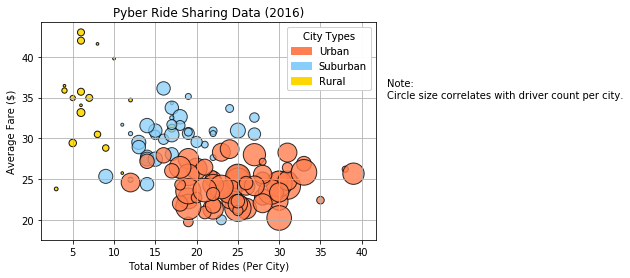

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(xrides_r, yfare_r, s=zcount_r, marker='o', alpha=0.9, c="#FFD700", edgecolor='black')
plt.scatter(xrides_s, yfare_s, s=zcount_s, alpha=0.75, c = "#87CEFA", edgecolor='black')
plt.scatter(xrides_u, yfare_u, s=zcount_u, alpha=0.8, c="coral", edgecolor='black')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(b=True, which='both', axis='both')
# plt.legend((zcount_u, zcount_s, zcount_r),
#            ('Urban', 'Suburban', 'Rural'),
#            scatterpoints=1,
#            loc='upper right',
#            ncol=3,
#            fontsize=8)
urban_patch = mpatches.Patch(color='coral', label='Urban')
suburban_patch = mpatches.Patch(color='#87CEFA', label='Suburban')
rural_patch = mpatches.Patch(color='#FFD700', label='Rural')
legend1 = plt.legend(handles=[urban_patch, suburban_patch, rural_patch], title="City Types")
#plt.legend([], "Note: Circle size correlates with driver count per city.", loc='center left', bbox_to_anchor=(1, 0.5))
text(43, 36,'Note: \nCircle size correlates with driver count per city.',
     horizontalalignment='left',
     verticalalignment='center')
plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend)
plt.show()


# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("PyberBubbleChart.png")

## Total Fares by City Type

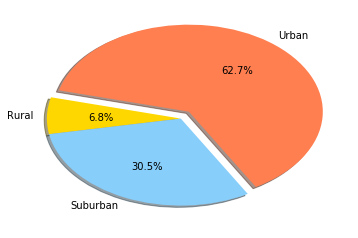

In [39]:
# Calculate Type Percents
ruralcash = 0
subcash = 0
urbancash = 0
for row in candr_df.itertuples():
    if row[6] == "Rural":     
        ruralcash = ruralcash + row[3]
    elif row[6] == "Suburban":
        subcash = subcash + row[3]
    elif row[6] == "Urban":
        urbancash = urbancash + row[3]
# print(ruralcash)        
# print(subcash)   
# print(urbancash)
explode1 = [0.1, 0.0, 0.0]
fare_dist = [urbancash, ruralcash, subcash]
farelabel = ["Urban", "Rural", "Suburban"]
colors1 = ["coral", "#FFD700", "#87CEFA"]
# Build Pie Chart
plt.pie(fare_dist, explode=explode1, labels=farelabel, colors=colors1,
        autopct='%.1f%%', shadow=True, startangle=300)
#plt.axis("equal")
# Save Figure
plt.show()
plt.savefig("PyberFarePieChart.png")

## Total Rides by City Type

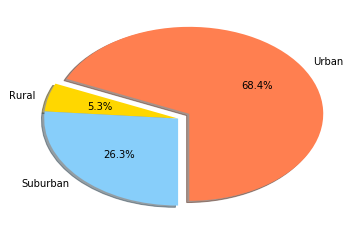

<Figure size 432x288 with 0 Axes>

In [42]:
# Calculate Ride Percents
ruralcount = 0
subcount = 0
urbancount = 0
for row in candr_df.itertuples():
    if row[6] == "Rural":     
        ruralcount = ruralcount + 1
    elif row[6] == "Suburban":
        subcount = subcount + 1
    elif row[6] == "Urban":
        urbancount = urbancount + 1
# print(ruralcount)        
# print(subcount)   
# print(urbancount)   
# Build Pie Chart
explode1 = [0.1, 0.0, 0.0]
fare_dist = [urbancount, ruralcount, subcount]
farelabel = ["Urban", "Rural", "Suburban"]
colors1 = ["coral", "#FFD700", "#87CEFA"]
# Build Pie Chart
plt.pie(fare_dist, explode=explode1, labels=farelabel, colors=colors1,
        autopct='%.1f%%', shadow=True, startangle=270)
#plt.axis("equal")
# Save Figure
plt.show()
plt.savefig("PyberRidesPieChart.png")

## Total Drivers by City Type

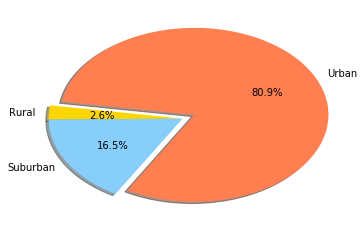

<Figure size 432x288 with 0 Axes>

In [44]:
# Calculate Driver Percents
rdrivers = 0
sdrivers = 0
udrivers = 0
for row in filed_candr_df.itertuples():
    if row[6] == "Rural":     
        rdrivers = rdrivers + row[5]
    elif row[6] == "Suburban":
        sdrivers = sdrivers + row[5]
    elif row[6] == "Urban":
        udrivers = udrivers + row[5]
# print(rdrivers)        
# print(sdrivers)   
# print(udrivers)  
# Build Pie Charts
explode1 = [0.1, 0.0, 0.0]
fare_dist = [udrivers, rdrivers, sdrivers]
farelabel = ["Urban", "Rural", "Suburban"]
colors1 = ["coral", "#FFD700", "#87CEFA"]
# Build Pie Chart
plt.pie(fare_dist, explode=explode1, labels=farelabel, colors=colors1,
        autopct='%.1f%%', shadow=True, startangle=240)
#plt.axis("equal")
# Save Figure
plt.show()
plt.savefig("PyberDriverPieChart.png")

